In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_boston
import sklearn as sklearn

boston = pd.read_csv('../../../data/lob/boston.csv') 
boston.keys()

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [2]:
boston.shape

(333, 15)

In [3]:
boston.head()

ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9

In [4]:
#boston.target contains the housing prices.
boston[:1]


ID     crim    zn  indus  chas    nox     rm   age   dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296   

   ptratio  black  lstat  medv  
0     15.3  396.9   4.98  24.0

In [9]:

# X = all the other features (or independent variables)
# drop the price column as I want only the parameters as my X values.
Y = boston['medv']
X = boston.drop('medv',axis=1)


In [10]:

X_train=X[:-50]
X_test=X[-50:]
Y_train=Y[:-50]
Y_test=Y[-50:]

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(283, 14)
(50, 14)
(283,)
(50,)


In [11]:
from sklearn.cross_validation import train_test_split


#you may be training your model on less expensive houses and testing on expensive houses.
#You have to divide your data sets randomly. Scikit learn provides a function called train_test_split to do this.

X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.33,random_state=5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)


(223, 14)
(110, 14)
(223,)
(110,)


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:

lm= LinearRegression()
lm.fit(X_train,Y_train)

lm.intercept_
lm.coef_

pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print ("Fit a model X_train, and calculate MSE with Y_train: %f" % np.mean((Y_train - pred_train) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test: %f"% np.mean((Y_test - pred_test) ** 2))



Fit a model X_train, and calculate MSE with Y_train: 22.203457
Fit a model X_train, and calculate MSE with X_test, Y_test: 25.795357


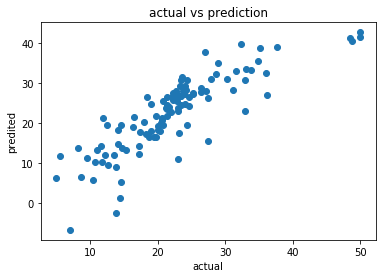

In [13]:

plt.scatter(Y_test,pred_test)
plt.xlabel("actual")
plt.ylabel("predited")
plt.title("actual vs prediction")
plt.show()


#zip (Y_test,pred_test)
#zip (Y_train,pred_train)
